In [ ]:
using OMJulia, Plots

In [ ]:
# OpenModelicaファイルのPATHの指定
model_name = "C:/work/test/BottleCooling1DCAE/CoolingBottle.mo"
CoolingBottle = OMJulia.OMCSession() 
CoolingBottle.ModelicaSystem(model_name,"CoolingBottle")


In [ ]:
# 初期値
t0_milk = 273.15 + 90 # [K]
t0_bottle = 273.15 + 90 # [K]
t_water = 273.15 + 15 # [K]

output_labels = [
    "time",
    "T_milk",
    "T_bottle",
]

# モデルパラメータ
h_interface = 67.4 # [W/m2・K * m2]
g_bottle = 12.4 # [W/K]
hc_milk = 336 # [J/K]
hc_bottle = 75.4 # [J/K]

# モデルパラメータ変更
CoolingBottle.setParameters([
    "T0Milk=$t0_milk",
    "T0Bottle=$t0_bottle",
    "TWater=$t_water",
    "HInterface=$h_interface",
    "GBottle=$g_bottle",
    "HCMilk=$hc_milk",
    "HCBottle=$hc_bottle",
])



In [ ]:
# 計算時間の設定
time_start = 0.0 # [s]
time_stop = 10.0 * 60 # [s]

# 計算時の時間刻み
dt = 1.0 # [s]
step_size = dt

CoolingBottle.setSimulationOptions([
    "startTime=$time_start",
    "stopTime=$time_stop",
    "stepSize=$step_size"
])


In [ ]:
# Simulation実行
CoolingBottle.simulate()

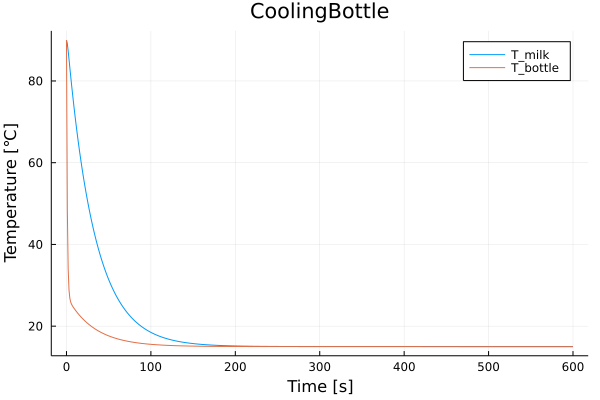

In [ ]:
# 結果取得
time,t_milk,t_bottle= CoolingBottle.getSolutions(output_labels)
# 要素数を取得
rows = size(time)[1]
# Kを℃に変換する処理
conversion_list = [-273.15 for t in 1:rows]
t_milk_c = t_milk + conversion_list
t_bottle_c = t_bottle + conversion_list
# グラフ描画
plot(time, [t_milk_c, t_bottle_c], label=["T_milk" "T_bottle"])
xlabel!("Time [s]")
ylabel!("Temperature [℃]")
title!("CoolingBottle")